In [1]:
import torch.backends.cudnn as cudnn
import torch
import torchvision.transforms as transforms
from nltk.translate.bleu_score import corpus_bleu
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from Evaluation import *
from Model import *
from Dataset import *
from Inference import GenerateCaption,Visualize_Attention
%load_ext autoreload
%autoreload 2

In [3]:
#get word map :
word_map_path = '../dataset/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json'
data_folder ='../dataset/'
data_name = 'coco_5_cap_per_img_5_min_word_freq'

#Data For Visualization 
#Show, Attend and Tell: Neural Image Caption Generation with Visual Attention
author_scores=(0.707,0.499,0.344,0.243) #  https://arxiv.org/abs/1502.03044 
ind = np.arange(5) 
width = 0.35  

In [4]:
# Load word map (word2ix)
with open(word_map_path, 'r') as j:
    word_map = json.load(j)

In [5]:
#load pretrained_model
model_data=torch.load("trained_model/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar")
model_data.keys()

dict_keys(['epoch', 'epochs_since_improvement', 'bleu-4', 'encoder', 'decoder', 'encoder_optimizer', 'decoder_optimizer'])

In [6]:
#load pretrained weights
encoder=model_data['encoder']
decoder=model_data['decoder']
generatecap= GenerateCaption(encoder,decoder,50,word_map)

In [7]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
#create vaidation dataset
valloader = torch.utils.data.DataLoader(
        COCODataset(data_folder, data_name, 'VAL', transform=transforms.Compose([normalize])),
        batch_size=1, shuffle=True, num_workers=1, pin_memory=True)

#create test dataset
testloader = torch.utils.data.DataLoader(
        COCODataset(data_folder, data_name, 'TEST', transform=transforms.Compose([normalize])),
        batch_size=1, shuffle=True, num_workers=1, pin_memory=True)

In [8]:
#Generate Validation BELU Scores
Val_scores=GetBlueScore(generatecap,valloader)

EVALUATING on Test Data: 100%|██████████| 25000/25000 [12:07<00:00, 34.34it/s]


In [9]:
#Generate Test BELU Scores
Test_scores=GetBlueScore(generatecap,testloader)

EVALUATING on Test Data: 100%|██████████| 25000/25000 [12:09<00:00, 34.29it/s]


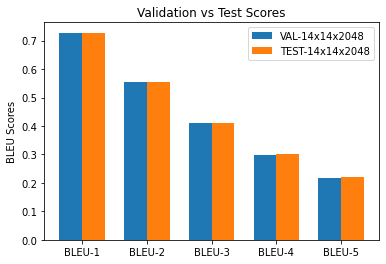

In [12]:
ind = np.arange(5) 
width = 0.35       
plt.bar(ind , Val_scores, width,label='VAL-14x14x2048')
plt.bar(ind + width, Test_scores, width,label='TEST-14x14x2048')

plt.ylabel('BLEU Scores')
plt.title('Validation vs Test Scores')

plt.xticks(ind + width / 2, ('BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'BLEU-5'))
plt.legend(loc='best')
plt.show()

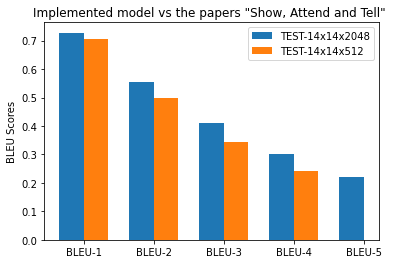

In [11]:

plt.bar(ind , Test_scores, width,label='TEST-14x14x2048')
plt.bar(ind[:4] + width, author_scores, width,label='TEST-14x14x512')

plt.ylabel('BLEU Scores')
plt.title('Implemented model vs the papers "Show, Attend and Tell" ')

plt.xticks(ind + width / 2, ('BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'BLEU-5'))
plt.legend(loc='best')
plt.show()